<span style="color: #111; font-family: 'Open Sans', sans-serif; font-size: 30px; font-weight: 300; line-height: 32px; margin: 0 0 72px; text-align: center;"> Regression and Correlation</span>
---
<span style="color: #111; font-family: 'Open Sans', sans-serif; font-size: 20px; font-weight: 300; line-height: 32px; margin: 0 0 72px; text-align: center;"> Jahnavi Tallapally, 17070124027</span>

### Problem Statement : To Perform correlation and regression analysis in R

In [ ]:
data <- read.csv("occupancy.csv")
#  data<-data[sample(nrow(data)),] Shuffle dataset
print(head(data))

              date Temperature Humidity    Light      CO2 HumidityRatio
1 02-02-2015 14:19     23.7000   26.272 585.2000 749.2000   0.004764163
2 02-02-2015 14:19     23.7180   26.290 578.4000 760.4000   0.004772661
3 02-02-2015 14:21     23.7300   26.230 572.6667 769.6667   0.004765153
4 02-02-2015 14:22     23.7225   26.125 493.7500 774.7500   0.004743773
5 02-02-2015 14:23     23.7540   26.200 488.6000 779.0000   0.004766594
6 02-02-2015 14:23     23.7600   26.260 568.6667 790.0000   0.004779332
  Occupancy
1         1
2         1
3         1
4         1
5         1
6         1


### 1.1 Pearson  Correlation

To calculate Pearson correlation,   
we can use the **cor()** function.   
The default method for cor() is the Pearson correlation.  
  
  Getting a correlation is generally only half the story, and you may want to know if the relationship is statistically significantly different from 0.
- H0: There is no correlation between the two variables: ρ = 0
- Ha: There is a nonzero correlation between the two variables: ρ ≠ 0


In [ ]:
cor(data$Temperature,data$Humidity,method='pearson')

[1] -0.1569635

So we can see that Temperature and Humidity are not correlated much with correlation coefficient -0.15 we can say that they are negligibly negatively correlated.

In [ ]:
cor(data$Temperature,data$Light,method='pearson')

[1] 0.6885711

The variables Light and Temperature are highly correlated as correlation coefficient is 0.688. We can say that they are related. Obviously if the temperature is more, we feel the sun may be blazing and hence more would be the light , likewise in the night the temperature is also less.

In [ ]:
cor.test(data$Temperature,data$Light,method='pearson')


	Pearson's product-moment correlation

data:  data$Temperature and data$Light
t = 136.14, df = 20558, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6813146 0.6956922
sample estimates:
      cor 
0.6885711 


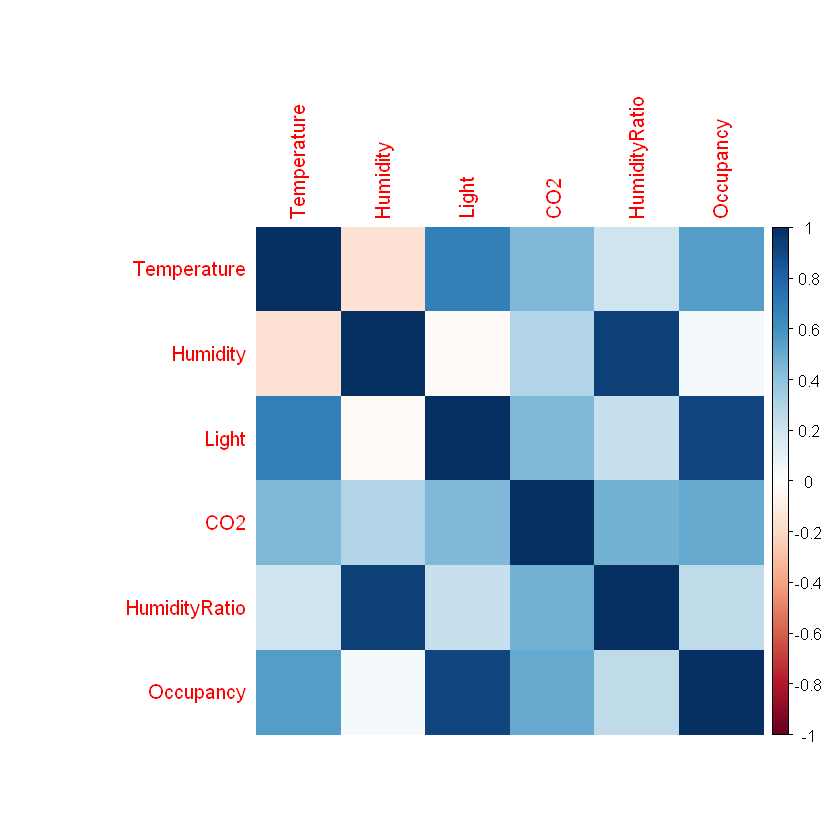

In [ ]:
library(corrplot)
corrplot(cor(data[,c(2,3,4,5,6,7)]),method="color")

In [ ]:
data[,c(2,3,4,5,6,7)]

### 1.2 Spearmen Correlation

di is the difference in the ranked observations from each group, (xi – yi), and n is the sample size. 

In [ ]:
cor(data$Temperature,data$Humidity,method='spearman')

[1] -0.1732717

In [ ]:
cor(data$Temperature,data$Light,method='spearman')

[1] 0.6306498

In [ ]:
cor.test(data$Temperature,data$Light,method='spearman')

Warning message in cor.test.default(data$Temperature, data$Light, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  data$Temperature and data$Light
S = 5.35e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6306498 


### 1.3 Kendall Rank Correlation

In [ ]:
cor(data$Temperature,data$Humidity,method='kendall')

[1] -0.1101386

In [ ]:
cor(data$Temperature,data$Light,method='kendall')

[1] 0.4719719

In [ ]:
cor.test(data$Temperature,data$Light,method='kendall')


	Kendall's rank correlation tau

data:  data$Temperature and data$Light
z = 90.23, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4719719 


## 2.  Regression Analysis

As this is a classification task where we have to predict whether on the input light, temperature, etc. we can predict if the room would be Occupied or not. So for this type of tasks, We can implement Logistic Regression or Decision tree like of Analysis

In [ ]:
library(caTools)

### 2.1 Logistic Regression

In [ ]:
set.seed(42)
split <- sample.split(data$Occupancy, SplitRatio = 0.75)

In [ ]:
occtrain <- subset(data[,c(2,3,4,5,6,7)], split == TRUE)
occtest <- subset(data[,c(2,3,4,5,6,7)], split == FALSE)

In [ ]:
#logistic regression model
model <- glm (Occupancy ~ ., data = occtrain, family = binomial)
summary(model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Occupancy ~ ., family = binomial, data = occtrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.4817  -0.0455  -0.0291  -0.0171   4.2048  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    7.008e+01  1.352e+01   5.182 2.20e-07 ***
Temperature   -3.855e+00  6.313e-01  -6.106 1.02e-09 ***
Humidity      -1.699e+00  3.746e-01  -4.536 5.73e-06 ***
Light          2.341e-02  6.483e-04  36.110  < 2e-16 ***
CO2            3.496e-03  3.093e-04  11.306  < 2e-16 ***
HumidityRatio  1.125e+04  2.362e+03   4.763 1.91e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16668.4  on 15419  degrees of freedom
Residual deviance:  1649.3  on 15414  degrees of freedom
AIC: 1661.3

Number of Fisher Scoring iterations: 12


In [ ]:
predict <- predict(model, type = 'response')

In [ ]:
#confusion matrix
table(occtrain$Occupancy, predict > 0.5)

   
    FALSE  TRUE
  0 11703   155
  1    15  3547

<b> Accuracy = 98.987 % </b>

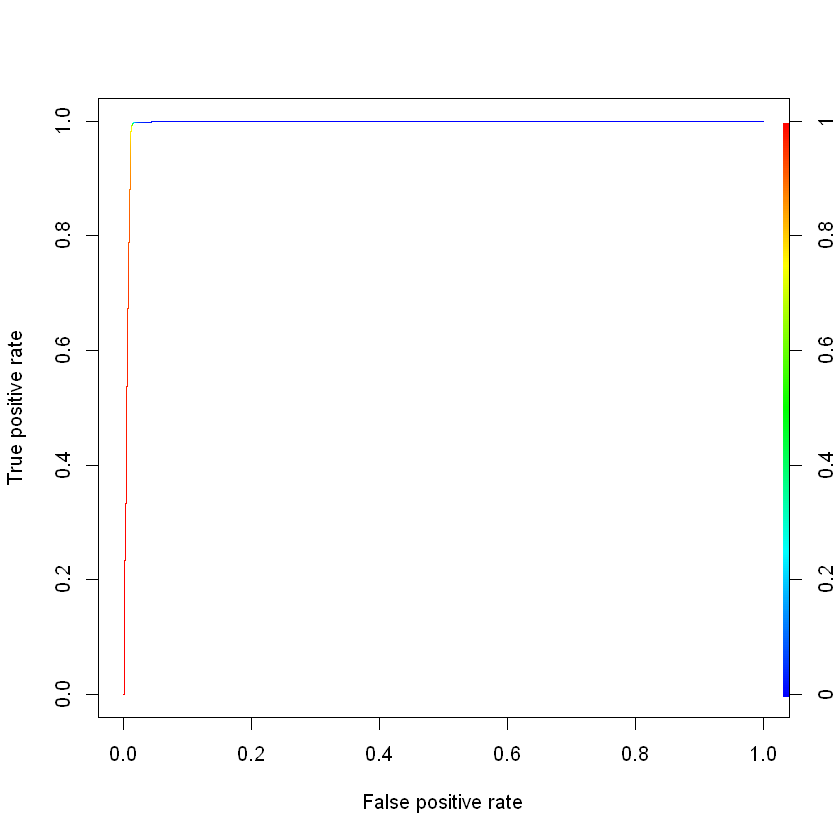

In [ ]:
#ROCR Curve
library(ROCR)
ROCRpred <- prediction(predict, occtrain$Occupancy)
ROCRperf <- performance(ROCRpred, 'tpr','fpr')
plot(ROCRperf, colorize = TRUE, text.adj = c(-0.2,1.7))

### 2.2 Decision Tree

In [ ]:
library(party)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich



In [ ]:
output.tree <- ctree(
  Occupancy ~ Temperature + Light + CO2  + Humidity + HumidityRatio, 
  data = data[,c(2,3,4,5,6,7)])

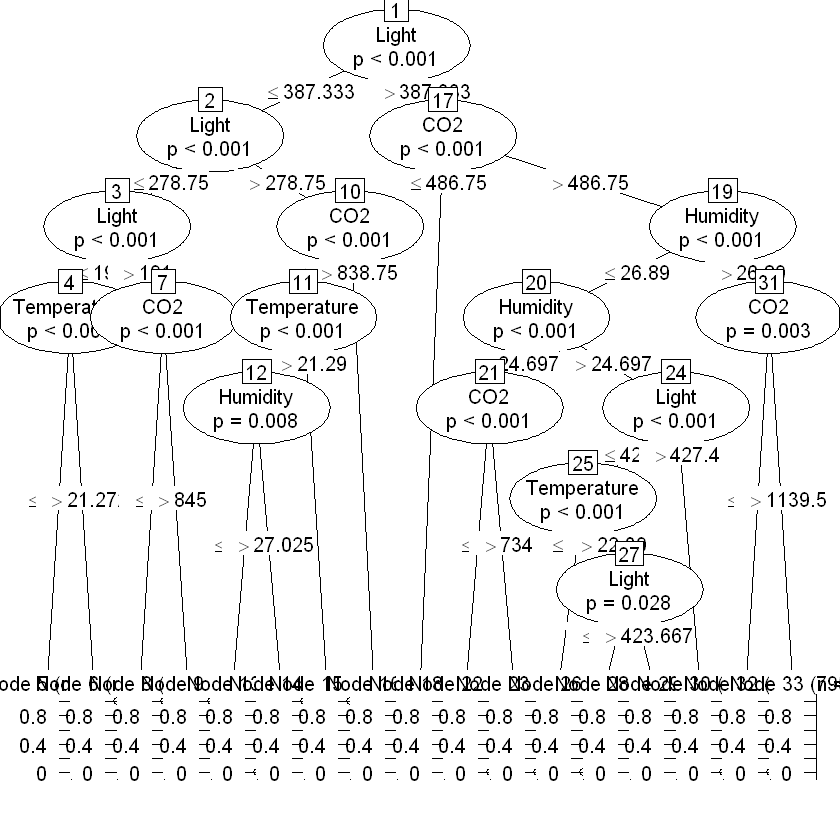

In [ ]:
plot(output.tree)

So we generate the Decision tree from which we can classify the Occupancy

# Conclusion

So here we learnt various important statistical  methods that are very important for the purpose of analyzing data before using it in any Regression or Classification model.
Later we implemented 2 Classification algorithms and they proved amazing and gave excellent results   

  
  
To summarize, We covered topics like - 

- Correlation
  - Pearson Correlation
  - Spearman Correlation
  - Kenddall Rank Correlation
- Classification
  - Logistic Regression
  - Decision Tree

!! End of the Notebook